Dataset Description
The data provided in this Github link is the fuel quality data from the Federal Energy Regulatory Commission which is provided by the United States Energy Information Administration. The data consists of the following columns:

'Record_id' : record id

'Utility_id_ferc1': Utility id assigned by the FERC

'Report_year': year of report

'Plant_name_ferc1': the name of the plant

'Fuel_type_code_pudl': the type of fuel

'Fuel_unit': the unit of fuel

'Fuel_qty_burned': the quantity of fuel burned

'Fuel_mmbtu_per_unit': the measure of energy per unit

'fuel_cost_per_unit_burned': the fuel cost per unit burned

'Fuel_cost_per_unit_delivered': the cost of fuel delivered per unit

'fuel_cost_per_mmbtu': the cost of fuel per mmbtu

**Exploratory Data Analysis does two main things:**
1. It helps clean up a dataset.
2. It gives you a better understanding of the variables and the relationships between them.

**1. Understanding Your Variables**

In [57]:
# Import all libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
fuel_data = pd.read_csv("https://raw.githubusercontent.com/WalePhenomenon/climate_change/master/fuel_ferc1.csv")
fuel_data

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570
...,...,...,...,...,...,...,...,...,...,...,...
29518,f1_fuel_2018_12_12_0_13,12,2018,neil simpson ct #1,gas,mcf,18799.0,1.059,4.78,4.78,9.030
29519,f1_fuel_2018_12_12_1_1,12,2018,cheyenne prairie 58%,gas,mcf,806730.0,1.050,3.65,3.65,6.950
29520,f1_fuel_2018_12_12_1_10,12,2018,lange ct facility,gas,mcf,104554.0,1.060,4.77,4.77,8.990
29521,f1_fuel_2018_12_12_1_13,12,2018,wygen 3 bhp 52%,coal,ton,315945.0,16.108,3.06,14.76,1.110


In [59]:
fuel_data.shape

(29523, 11)

In [60]:
fuel_data.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [61]:
fuel_data.columns

Index(['record_id', 'utility_id_ferc1', 'report_year', 'plant_name_ferc1',
       'fuel_type_code_pudl', 'fuel_unit', 'fuel_qty_burned',
       'fuel_mmbtu_per_unit', 'fuel_cost_per_unit_burned',
       'fuel_cost_per_unit_delivered', 'fuel_cost_per_mmbtu'],
      dtype='object')

In [62]:
fuel_data.nunique(axis = 0)

record_id                       29523
utility_id_ferc1                  185
report_year                        25
plant_name_ferc1                 2315
fuel_type_code_pudl                 6
fuel_unit                           9
fuel_qty_burned                 26432
fuel_mmbtu_per_unit             11227
fuel_cost_per_unit_burned       19416
fuel_cost_per_unit_delivered    16675
fuel_cost_per_mmbtu             12605
dtype: int64

In [63]:
fuel_data.describe().apply(lambda s: s.apply(lambda x: format(x, "f")))

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523.000000,29523.000000,29523.000000,29523.000000,29523.000000,29523.000000,29523.000000
mean,118.601836,2005.806050,2622119.380788,8.492111,208.649031,917.570449,19.304354
std,74.178353,7.025483,9118003.526561,10.600220,2854.490090,68775.925333,2091.540939
min,1.000000,1994.000000,1.000000,0.000001,-276.080000,-874.937000,-41.501000
25%,55.000000,2000.000000,13817.000000,1.024000,5.207000,3.778500,1.940000
50%,122.000000,2006.000000,253322.000000,5.762694,26.000000,17.371000,4.127000
75%,176.000000,2012.000000,1424034.000000,17.006000,47.113000,42.137000,7.745000
max,514.000000,2018.000000,555894250.000000,341.260000,139358.000000,7964521.000000,359278.000000


In [64]:
fuel_data.fuel_type_code_pudl.unique()

array(['coal', 'gas', 'nuclear', 'oil', 'waste', 'other'], dtype=object)

In [65]:
fuel_data.report_year.unique()

array([1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018], dtype=int64)

In [66]:
# Reclassify condition column
'''
def clean_condition(row):
    
    good = ['good','fair']
    excellent = ['excellent','like new']       
    
    if row.condition in good:
        return 'good'   
    if row.condition in excellent:
        return 'excellent'    
    return row.condition# Clean dataframe
def clean_df(playlist):
    df_cleaned = df.copy()
    df_cleaned['condition'] = df_cleaned.apply(lambda row: clean_condition(row), axis=1)
    return df_cleaned# Get df with reclassfied 'condition' column
df_cleaned = clean_df(df)print(df_cleaned.condition.unique())
'''

"\ndef clean_condition(row):\n    \n    good = ['good','fair']\n    excellent = ['excellent','like new']       \n    \n    if row.condition in good:\n        return 'good'   \n    if row.condition in excellent:\n        return 'excellent'    \n    return row.condition# Clean dataframe\ndef clean_df(playlist):\n    df_cleaned = df.copy()\n    df_cleaned['condition'] = df_cleaned.apply(lambda row: clean_condition(row), axis=1)\n    return df_cleaned# Get df with reclassfied 'condition' column\ndf_cleaned = clean_df(df)print(df_cleaned.condition.unique())\n"

**2. Cleaning your dataset**

In [67]:
#fuel_data_cleaned = fuel_data.copy().drop(["url","image_url","city_url"]).... This is use to drop or clean your data but so far I will be needing all my variables, I wont run it

Next, I wanted to get rid of any columns that had too many null values. Thanks to Terence S (is article I read on medium), I used the following code to remove any columns that had 40% or more of its data as null values. Depending on the situation, I may want to increase or decrease the threshold. The remaining columns are shown below.

In [68]:
NA_val = fuel_data.isna().sum()
def na_filter(na, threshold = .4): #only select variables that passees the threshold
    col_pass = []
    for i in na.keys():
        if na[i]/fuel_data.shape[0]<threshold:
            col_pass.append(i)
    return col_pass
fuel_data = fuel_data[na_filter(NA_val)]
fuel_data.columns

Index(['record_id', 'utility_id_ferc1', 'report_year', 'plant_name_ferc1',
       'fuel_type_code_pudl', 'fuel_unit', 'fuel_qty_burned',
       'fuel_mmbtu_per_unit', 'fuel_cost_per_unit_burned',
       'fuel_cost_per_unit_delivered', 'fuel_cost_per_mmbtu'],
      dtype='object')

**Removing Outliers**

To remove any values outside the set boundaries. Though there are ways in which optimal boundaries are set, but this is beyond our scope.
But to play around we can just set some boundaries for some variables.

In [69]:
#fuel_data = fuel_data[fuel_data["report_year"].between(2000, 2019)] #just the report of the 20th century
#fuel_data = fuel_data[fuel_data["fuel_type_code_pudl"].drop("waste","other"), axis = 0]#... this code as syntax error
#fuel_data = fuel_data[fuel_data["fuel_cost_per_unit_burned"] > 1000]#to give the reoprt of cost of burned fuel greater than 1000
#fuel_data.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

In [70]:
#fuel_data = fuel_data.dropna(axis = 0) #Removing Rows with Null Values
#fuel_data.shape

**3. Analyzing relationships between variables**

**Correlation Matrix**

One of the first best thing to do when analyzing variables is visualizing it through a correlation matrix because it’s the fastest way to develop a general understanding of all of the variables. To review, correlation is a measurement that describes the relationship between two variables Thus, a correlation matrix is a table that shows the correlation coefficients between many variables. I used sns.heatmap() to plot a correlation matrix of all of the variables in the fuel dataset.

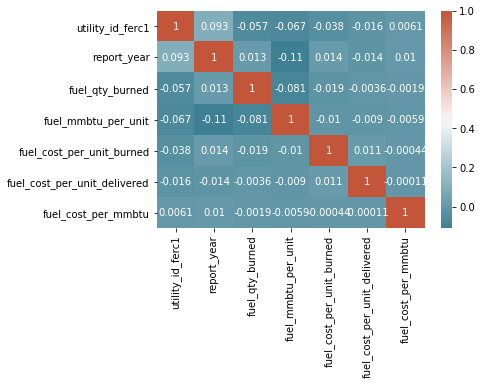

In [71]:
# calculate correlation matrix
corr = fuel_data.corr()
#plot heat map
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

**Scatterplot**

It’s pretty hard to beat correlation heatmaps when it comes to data visualizations, but scatterplots are arguably one of the most useful visualizations when it comes to data.

A scatterplot is a type of graph which ‘plots’ the values of two variables along two axes, like age and height. Scatterplots are useful for many reasons: like correlation matrices, it allows you to quickly understand a relationship between two variables, it’s useful for identifying outliers, and it’s instrumental when polynomial multiple regression models 

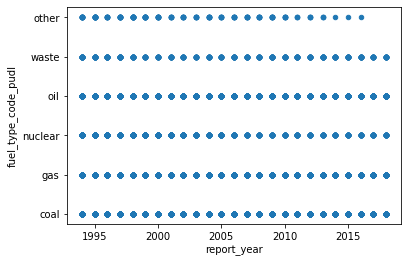

In [72]:
fuel_data.plot(kind='scatter', x="report_year", y="fuel_type_code_pudl")

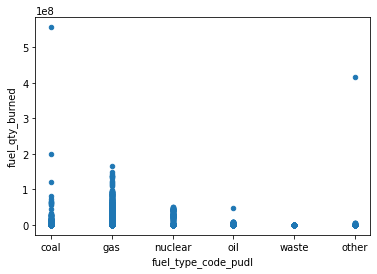

In [73]:
fuel_data.plot(kind='scatter', x="fuel_type_code_pudl", y="fuel_qty_burned")

As a bonus, sns.pairplot() is a great way to create scatterplots between all of your variables.

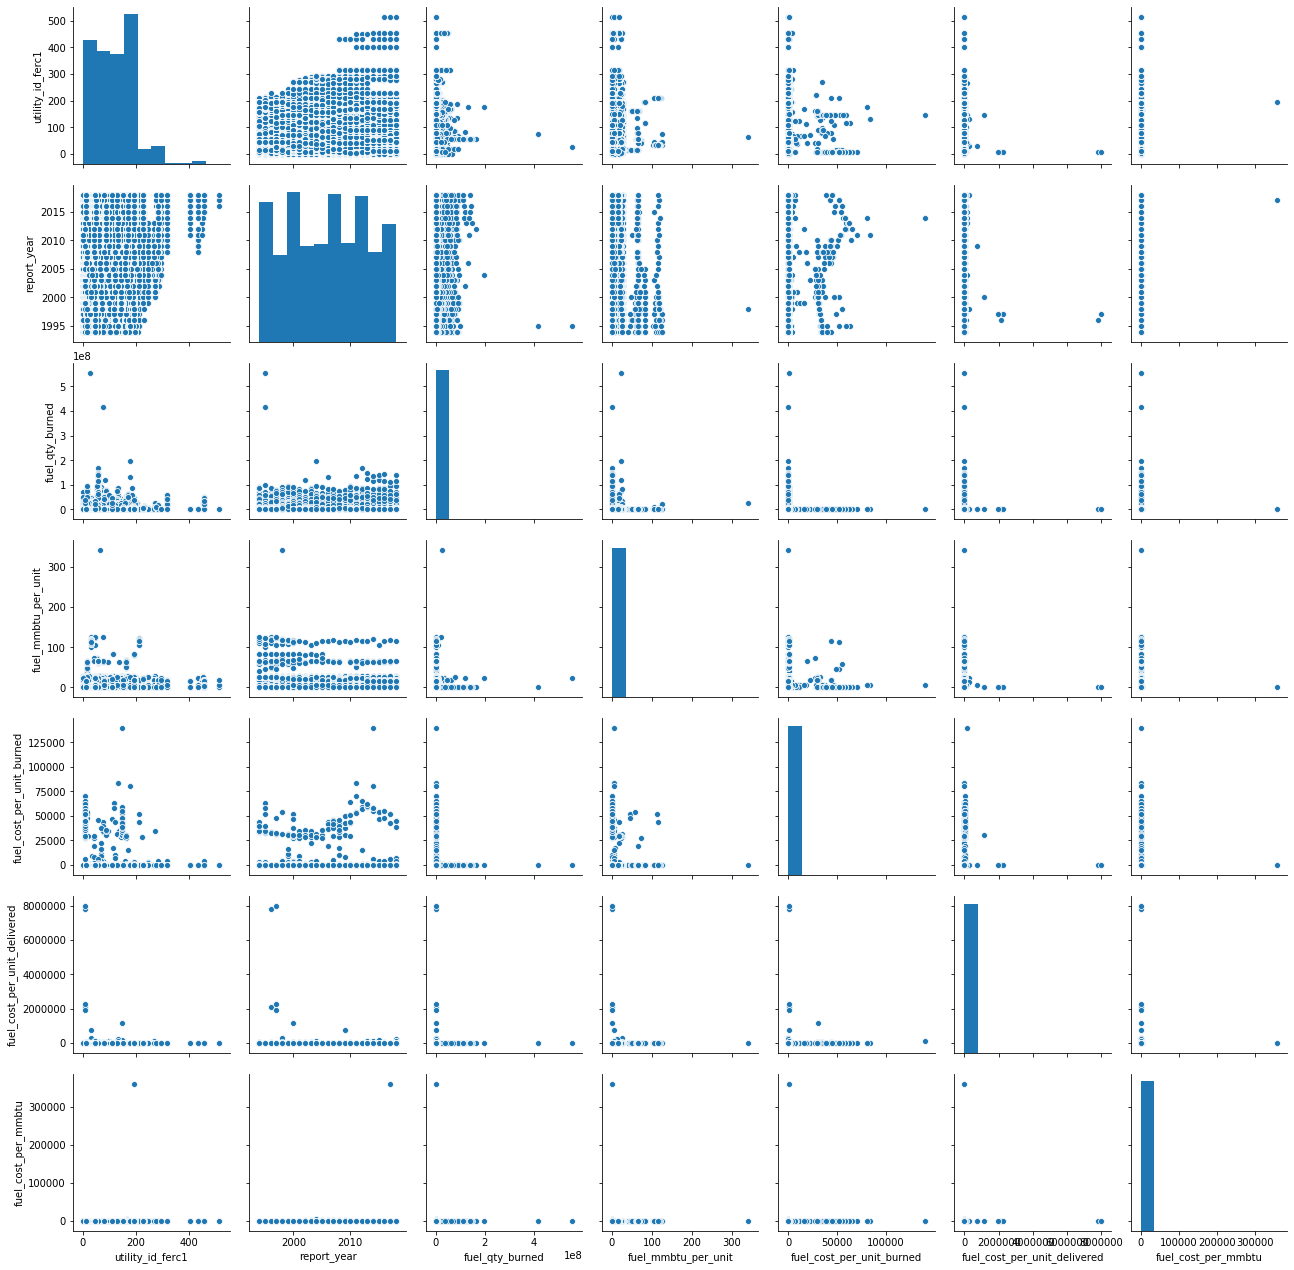

In [74]:
sns.pairplot(fuel_data)

**Histogram**

Correlation matrices and scatterplots are useful for exploring the relationship between two variables. But what if you only wanted to explore a single variable by itself? This is when histograms come into play. Histograms look like bar graphs but they show the distribution of a variable’s set of values. And histogram at times is not the best for some kind of dataset


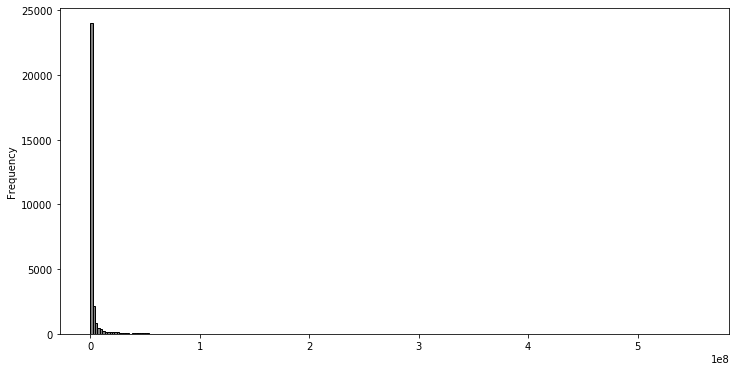

In [87]:
fuel_data["fuel_qty_burned"].plot(kind='hist', bins=250, figsize=(12,6), facecolor='grey',edgecolor='black')

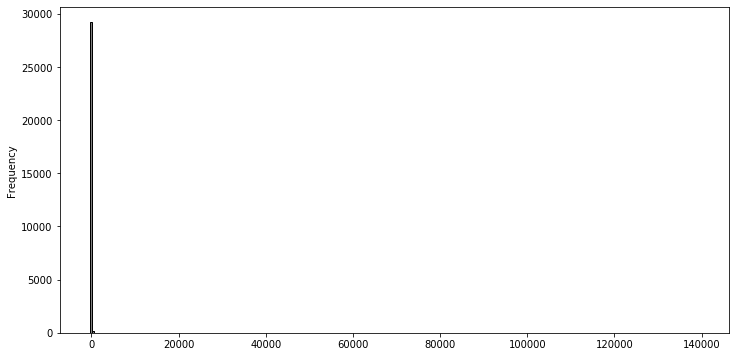

In [88]:
fuel_data["fuel_cost_per_unit_burned"].plot(kind='hist', bins=300, figsize=(12,6), facecolor='grey',edgecolor='black')

**Boxplot**

Another way to visualize the distribution of a variable is a boxplot. We’re going to look at 'fuel burned', 'cost of fuel burned' and 'cost of fuel delivered' this time as an example.

(1, 55589425)

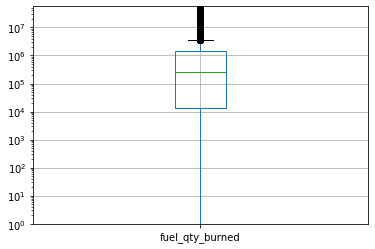

In [98]:
fd = fuel_data.boxplot("fuel_qty_burned")
fd.set_yscale("log")
fd.set_ylim(1, 55589425)

C:\Users\AYA WAHEED\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  This is separate from the ipykernel package so we can avoid doing imports until


(3.127593928047058, 139358)

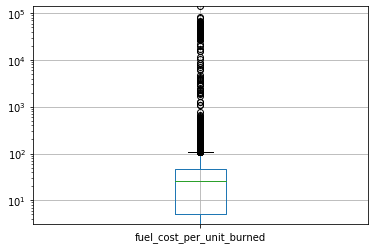

In [99]:
fd = fuel_data.boxplot("fuel_cost_per_unit_burned")
fd.set_yscale("log")
fd.set_ylim(-276, 139358)

C:\Users\AYA WAHEED\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  This is separate from the ipykernel package so we can avoid doing imports until


(1.8244308815635841, 7964521)

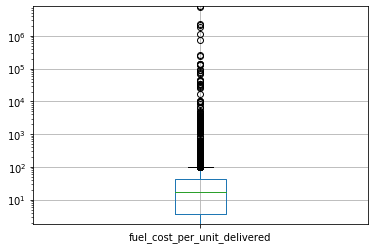

In [100]:
fd = fuel_data.boxplot("fuel_cost_per_unit_delivered")
fd.set_yscale("log")
fd.set_ylim(-874, 7964521)

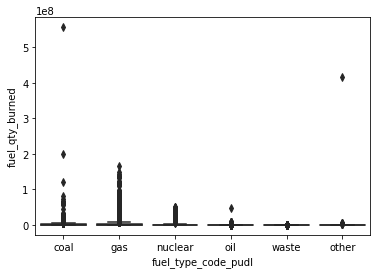

In [90]:
sns.boxplot(x = "fuel_type_code_pudl", y = "fuel_qty_burned", palette = ["m", "g"], data = fuel_data)

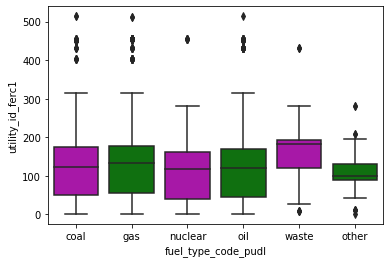

In [91]:
sns.boxplot(x = "fuel_type_code_pudl", y = "utility_id_ferc1", palette = ["m", "g"], data = fuel_data)

There are several other types of visualizations that weren’t covered that you can use depending on the dataset like stacked bar graphs, area plots, violin plots, and even geospatial visuals.
By going through the three steps of exploratory data analysis, you’ll have a much better understanding of your data, which will make it easier to choose your model, your attributes, and refine it overall.

All thanks to 'Terence S', that's his name on medium. And the link to his article is "https://towardsdatascience.com/an-extensive-guide-to-exploratory-data-analysis-ddd99a03199e ". Although, he used a different data set and there are little stuffs I included here that is not his work. 